# Working with Time Series Data

**Table of contents**<a id='toc0_'></a>    
- [Import Statements](#toc1_)    
- [Reading Time Data and Handling Timezone Information](#toc2_)    
  - [*Basic informations and some knowhows about Timezones*](#toc2_1_)    
  - [**Working with UTC time data**](#toc2_2_)    
    - [*The `pd.to_datetime(args, utc, format)` function*](#toc2_2_1_)    
    - [*Converting to a different timezone, The `.dt.tz_convert(timezone)` method*](#toc2_2_2_)    
  - [**Working with Local time data**](#toc2_3_)    
  - [**Working with UNIX Epoch time**](#toc2_4_)    
- [The `.dt` Accessor](#toc3_)    
  - [*The `dt.strftime()` method*](#toc3_1_)    
- [Dates in the Index](#toc4_)    
    - [*Finding missing data*](#toc4_1_1_)    
    - [*Handling Missing data*](#toc4_1_2_)    
  - [*Shifting Data*](#toc4_2_)    
  - [*Rolling window calculations*](#toc4_3_)    
- [Resampling](#toc5_)    
  - [*Using the `.transform()` method on a `Resampler` Object*](#toc5_1_)    
- [Example](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=4
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_'></a>[Import Statements](#toc0_)

--------------------------

In [173]:
# import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, timezone

In [174]:
# view options
pd.set_option("display.max_columns", 14)
pd.set_option("display.max_rows", 10)

---------------------------

## <a id='toc2_'></a>[Reading Time Data and Handling Timezone Information](#toc0_)

-----------------------

### <a id='toc2_1_'></a>[*Basic informations and some knowhows about Timezones*](#toc0_)

- **``UTC time:``** Coordinated Universal Time (UTC) serves as the international standard for timekeeping and forms the basis for global time coordination. It is centered at the Prime Meridian (0 degrees longitude), which runs through the Royal Observatory in Greenwich, London, and serves as the reference point for time measurement. The need for coordinated timekeeping on a global scale became evident in the mid-20th century, leading to the establishment of UTC. On January 1, 1960, international efforts began to coordinate time and frequency transmissions worldwide. This coordination ensures that various systems and technologies across the globe are synchronized accurately.

   UTC has several essential characteristics and plays a critical role in the synchronization of time and frequency transmissions worldwide.

   1. *Monotonically Increasing Time*: UTC is designed to be a continuously increasing time standard. This means that as time progresses, the value of UTC never decreases. This property is crucial for various applications that rely on chronological order, such as financial transactions, event logging, and scientific data analysis.

   2. *Time Zones and UTC Offset*: To account for the Earth's rotation and its division into time zones, regions around the world express their local times as positive or negative offsets from UTC. These offsets are often provided in hours and minutes. For example, Salt Lake City, Utah, is in the America/Denver time zone, which may have an offset of either 6 or 7 hours from UTC, depending on daylight saving time observance.

- **``Daylight Saving Time (DST):``** Many regions, especially those at higher latitudes, observe daylight saving time. During DST, clocks are typically set forward in the spring and set back in the fall. This practice can create "ambiguous time" when clocks are turned back, resulting in a repeated hour. For this reason, if you are dealing with **local times**, you will want three things: **the time, the timezone, and an offset**. If you are only concerned with **duration**, you can just use **UTC time** or seconds since **UNIX epoch**.

   *Some terminologies*:
   
   - *Naive Time*: A time without a specified timezone or offset is often referred to as "naive" time. Naive times lack context and can lead to misinterpretations or errors when working across different locations or systems.
   - *Civil Time/Wall Time*: Time specified in a local timezone is known as "civil time" or "wall time." This is the time that people typically use for everyday activities, such as meetings, appointments, and scheduling.


**A general recommendation for programmers is to store dates in UTC times and then convert them to local time as needed.**

Storing data in UTC ensures a consistent, monotonically increasing time reference, and it avoids the complexities associated with daylight saving time changes and time zone conversions. When displaying or working with times in a specific local context, you can and should convert UTC times to the relevant local timezone as needed.

##### **Resources:**

- Getting the correct timezone name is important. The recommendation is prefacing your search with ”IANA” (e.g, ”IANA Timezone for Salt Lake City”) and then double checking your result in this Wikipedia article (https://en.wikipedia.org/wiki/List_of_tz_database_time_zones).
- This [blog post](http://www.ines-panker.com/2020/10/26/all-date-formats.html) discusses What are UTC time, ISO time format and UNIX time.

### <a id='toc2_2_'></a>[**Working with UTC time data**](#toc0_)

In [175]:
# ./utc_time_data.csv contains made up data
utc_data = pd.read_csv("./Data/utc_time_data.csv").UTC_Date

In [176]:
utc_data

0     2015 -03 -08 08:00:00-07:00
1     2015 -03 -08 08:30:00-07:00
2     2015 -03 -08 09:00:00+06:00
3     2015 -03 -08 09:30:00+06:00
4     2015 -11 -01 06:30:00+06:00
                 ...             
9     2015 -11 -01 08:00:00-07:00
10    2015 -11 -01 08:30:00-07:00
11    2015 -11 -01 09:00:00-07:00
12    2015 -11 -01 09:30:00-07:00
13    2015 -11 -01 10:00:00-07:00
Name: UTC_Date, Length: 14, dtype: object

#### <a id='toc2_2_1_'></a>[*The `pd.to_datetime(args, utc, format)` function*](#toc0_)

The *pd.to_datetime()* mehod converts specified iterables (columns of a DataFrame i.e, a Series object, list etc.) to pandas DateTimeIndex object.


- To convert a series containing datetime data as *utc date* we need to set, **utc=True**. Setting, `utc=True` will `automatically convert` the data to an `offset of 00:00`.
- The format argument is used if the time has a certain pattern in its representation. The available format codes can be found at, https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior.


**Note:** We could've also used the `parse_dates` argument of the `pd.read_csv()` function to convert the date column to a datetime64 object.

In [177]:
utc_time = pd.to_datetime(utc_data, utc=True)

In [178]:
utc_time

0    2015-03-08 15:00:00+00:00
1    2015-03-08 15:30:00+00:00
2    2015-03-08 03:00:00+00:00
3    2015-03-08 03:30:00+00:00
4    2015-11-01 00:30:00+00:00
                ...           
9    2015-11-01 15:00:00+00:00
10   2015-11-01 15:30:00+00:00
11   2015-11-01 16:00:00+00:00
12   2015-11-01 16:30:00+00:00
13   2015-11-01 17:00:00+00:00
Name: UTC_Date, Length: 14, dtype: datetime64[ns, UTC]

In [179]:
# UTC offset -07:00 means that we have subtracted -07:00 from the UTC at 00:00 to get to the timezone data
# we now have So to get back to UTC at 00:00 we would add 07:00 to the datetime we have (as our data).

Once we have converted a series to a datetime object we can utilize the `.dt` accessor, which gives us some awesome tools for dealing with dates.

#### <a id='toc2_2_2_'></a>[*Converting to a different timezone, The `.dt.tz_convert(timezone)` method*](#toc0_)

To convert UTC datetime data to a certain timezone we can use the `.dt.tz_convert()` method.

In [180]:
# say, we wanted to convert the utc_time to the Dhaka timezone (capital of Bangladesh)
# from internet we determine that the correct timezone for Dhaka is, 'Asia/Dhaka'

# UTC offset +06:00 means that we are adding +06:00 to the UTC at 00:00.
# So to get back to UTC at 00:00 we would subtract 06:00 from the Asia/Dhaka timezone time.
utc_time.dt.tz_convert("Asia/Dhaka")

0    2015-03-08 21:00:00+06:00
1    2015-03-08 21:30:00+06:00
2    2015-03-08 09:00:00+06:00
3    2015-03-08 09:30:00+06:00
4    2015-11-01 06:30:00+06:00
                ...           
9    2015-11-01 21:00:00+06:00
10   2015-11-01 21:30:00+06:00
11   2015-11-01 22:00:00+06:00
12   2015-11-01 22:30:00+06:00
13   2015-11-01 23:00:00+06:00
Name: UTC_Date, Length: 14, dtype: datetime64[ns, Asia/Dhaka]

### <a id='toc2_3_'></a>[**Working with Local time data**](#toc0_)

To load local date information, we need to have all three of **the date, the offset, and the timezone** informations.

In [181]:
local = pd.read_csv("./Data/local_time_data.csv")
local_date_time = local.local_date_time
offset = local.offset

In [182]:
local_date_time

0     2015 -03 -08 01:00:00
1     2015 -03 -08 01:30:00
2     2015 -03 -08 02:00:00
3     2015 -03 -08 02:30:00
4     2015 -03 -08 03:00:00
              ...          
14    2015 -11 -01 01:00:00
15    2015 -11 -01 01:30:00
16    2015 -11 -01 02:00:00
17    2015 -11 -01 02:30:00
18    2015 -11 -01 03:00:00
Name: local_date_time, Length: 19, dtype: object

<u>**Workflow:**</u>

1. First, we will convert the 'local_date_time' to a naive (i.e, w/o timezone information) datetime format using the `pd.to_datetime()` function.
2. We will group the 'local_date_time' datetime object by the offset.
    - If we pass in a series to a `groupby` object it will first align the passed series to the original data (much like adding a new column to the data). Note that, it will enter NaN at the end if series length is smaller than the length of the dataframe. 
    - After that, the actual grouping will be done. The groups will have the series value that each was grouped by as their names (accessible by `grp.name`).
3. To retain the original index positions we will be using the groupby `.transform()` method instead of the `.agg()` method. 
4. After that, the naive date data will be converted to a `timezone-aware` format with the help of, `.dt.tz_localize(tz:str, pytz.timezone)` method.
5. Finally we will be converting the timezone-aware object to the local timezone using the `.dt.tz_convert()` method.

One caveat in this process is that our offset series doesn't have the proper timezone format i,e, `HH:MM`. As a result, if we tried to produce a timezone aware datetime object it will only modify the MM and not the HH. So, first we convert the offset series entries to proper format. 

In [183]:
# see that, offset doesn't have the proper formatting
# offset.sample(2)

In [184]:
# formatting offset series entries to HH:MM
offset = offset.replace({-7: "-07:00", -6: "-06:00"})

In [185]:
# see what changed after formatting
# offset.sample(2)

In [186]:
for name, grp in pd.to_datetime(local_date_time, format="mixed").groupby(offset):
    print(f"Name:\n{name}")
    print(f"Group:\n{grp}")

Name:
-06:00
Group:
5    2015-03-08 02:00:00
6    2015-03-08 02:30:00
7    2015-03-08 03:00:00
8    2015-03-08 03:30:00
9    2015-11-01 00:30:00
10   2015-11-01 01:00:00
11   2015-11-01 01:30:00
12   2015-11-01 02:00:00
13   2015-11-01 02:30:00
Name: local_date_time, dtype: datetime64[ns]
Name:
-07:00
Group:
0    2015-03-08 01:00:00
1    2015-03-08 01:30:00
2    2015-03-08 02:00:00
3    2015-03-08 02:30:00
4    2015-03-08 03:00:00
14   2015-11-01 01:00:00
15   2015-11-01 01:30:00
16   2015-11-01 02:00:00
17   2015-11-01 02:30:00
18   2015-11-01 03:00:00
Name: local_date_time, dtype: datetime64[ns]


In [187]:
# Here we convert the naive time to America/Denver timezone

local_time = (
    pd.to_datetime(local_date_time, format="mixed")
    .groupby(offset)
    .transform(
        lambda grp_: grp_.dt.tz_localize(grp_.name).dt.tz_convert("America/Denver")
    )
)

In [188]:
local_time

0    2015-03-08 01:00:00-07:00
1    2015-03-08 01:30:00-07:00
2    2015-03-08 03:00:00-06:00
3    2015-03-08 03:30:00-06:00
4    2015-03-08 04:00:00-06:00
                ...           
14   2015-11-01 01:00:00-07:00
15   2015-11-01 01:30:00-07:00
16   2015-11-01 02:00:00-07:00
17   2015-11-01 02:30:00-07:00
18   2015-11-01 03:00:00-07:00
Name: local_date_time, Length: 19, dtype: datetime64[ns, America/Denver]

- Converting local time to UTC

In [189]:
# or, pd.to_datetime(local_time, utc=True)
local_time.dt.tz_convert("UTC")

0    2015-03-08 08:00:00+00:00
1    2015-03-08 08:30:00+00:00
2    2015-03-08 09:00:00+00:00
3    2015-03-08 09:30:00+00:00
4    2015-03-08 10:00:00+00:00
                ...           
14   2015-11-01 08:00:00+00:00
15   2015-11-01 08:30:00+00:00
16   2015-11-01 09:00:00+00:00
17   2015-11-01 09:30:00+00:00
18   2015-11-01 10:00:00+00:00
Name: local_date_time, Length: 19, dtype: datetime64[ns, UTC]

### <a id='toc2_4_'></a>[**Working with UNIX Epoch time**](#toc0_)

- To find the time elapsed (in seconds) since UNIX epoch at Jan 1, 1970 midnight UTC -

In [190]:
unix_local = local_time.view(int).floordiv(1e9).astype(int)
unix_local

0     1425801600
1     1425803400
2     1425805200
3     1425807000
4     1425808800
         ...    
14    1446364800
15    1446366600
16    1446368400
17    1446370200
18    1446372000
Name: local_date_time, Length: 19, dtype: int64

In [191]:
# or,
local_time.apply(lambda x: x.timestamp()).astype(int)  # each entry is of datetime type

0     1425801600
1     1425803400
2     1425805200
3     1425807000
4     1425808800
         ...    
14    1446364800
15    1446366600
16    1446368400
17    1446370200
18    1446372000
Name: local_date_time, Length: 19, dtype: int64

- To convert epoch information into UTC -

In [192]:
pd.to_datetime(unix_local, unit="s").dt.tz_localize("UTC")

0    2015-03-08 08:00:00+00:00
1    2015-03-08 08:30:00+00:00
2    2015-03-08 09:00:00+00:00
3    2015-03-08 09:30:00+00:00
4    2015-03-08 10:00:00+00:00
                ...           
14   2015-11-01 08:00:00+00:00
15   2015-11-01 08:30:00+00:00
16   2015-11-01 09:00:00+00:00
17   2015-11-01 09:30:00+00:00
18   2015-11-01 10:00:00+00:00
Name: local_date_time, Length: 19, dtype: datetime64[ns, UTC]

**`Note:`** In UNIX time format, leap seconds are ignored, with a leap second having the same Unix time as the second before it, and every day is treated as if it contains exactly 86400 seconds. Due to this treatment, Unix time is not a true representation of UTC.

--------------------------------------------

## <a id='toc3_'></a>[The `.dt` Accessor](#toc0_)

-------------------------------------------

**The .dt accessor** provides us access to some very useful datatime properties and mehtods (all of python `datetime` object methods and more).

- DateTime properties: https://pandas.pydata.org/pandas-docs/stable/reference/series.html#datetime-properties

- DateTime methods: https://pandas.pydata.org/pandas-docs/stable/reference/series.html#datetime-methods

- Period properties: https://pandas.pydata.org/pandas-docs/stable/reference/series.html#period-properties 

- TimeDelta properties: https://pandas.pydata.org/pandas-docs/stable/reference/series.html#timedelta-properties

- TimeDelta methods: https://pandas.pydata.org/pandas-docs/stable/reference/series.html#timedelta-methods

In [193]:
# For example to calculate year, week, and day according to the ISO 8601 standard
local_time.dt.isocalendar()

,year,week,day
0,2015,10,7
1,2015,10,7
2,2015,10,7
3,2015,10,7
4,2015,10,7
...,...,...,...
14,2015,44,7
15,2015,44,7
16,2015,44,7
17,2015,44,7


### <a id='toc3_1_'></a>[*The `dt.strftime()` method*](#toc0_)

The `.dt.strftime(format)` method will convert a pandas datetime object to a string using the specified formatting style. To see all the available format codes see the documentation @https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes

In [194]:
# for example, let's say we want our local_time series data as a string in the form of
# e.g, 03 Jan 2000 02:44 PM MDT
local_time.dt.strftime("%d %b %Y %I:%M %p %Z").head(3)

0    08 Mar 2015 01:00 AM MST
1    08 Mar 2015 01:30 AM MST
2    08 Mar 2015 03:00 AM MDT
Name: local_date_time, dtype: object

----------------------

## <a id='toc4_'></a>[Dates in the Index](#toc0_)

---------------------

First let us read in the "alta-noaa-1980-2019.csv" dataset. This dataset contains information about the amount of snow fall in a ski resort.

In [195]:
alta_df = pd.read_csv("./Data/alta-noaa-1980-2019.csv", parse_dates=["DATE"]).set_index(
    "DATE"
)

In [196]:
alta_df_snow = alta_df.SNOW.rename("snow")
alta_df_snow

DATE
1980-01-01    2.0
1980-01-02    3.0
1980-01-03    1.0
1980-01-04    0.0
1980-01-05    0.0
             ... 
2019-09-03    0.0
2019-09-04    0.0
2019-09-05    0.0
2019-09-06    0.0
2019-09-07    0.0
Name: snow, Length: 14160, dtype: float64

- Slicing Time series

As the index is a datetime object, we can slice it with a string (or a partial string) that represents the date. If we specify just the month on a slice, it includes all entries from that month *(for slicing end is inclusive)*.

In [197]:
alta_df_snow.loc["1980/2":"1980/3"]

DATE
1980-02-01     0.0
1980-02-02     0.0
1980-02-03     0.0
1980-02-04     1.0
1980-02-05     0.0
              ... 
1980-03-27     0.0
1980-03-28    12.0
1980-03-29     0.0
1980-03-30     0.0
1980-03-31    13.0
Name: snow, Length: 60, dtype: float64

#### <a id='toc4_1_1_'></a>[*Finding missing data*](#toc0_)

In [198]:
# at first, let us check whether the data has any missing values at all
alta_df_snow.isna().any()

True

In [199]:
# looks like it indeed has missing values. let's create a filter to see which dates has missing values
alta_df_snow.loc[alta_df_snow.isna()]

DATE
1985-07-30   NaN
1985-09-12   NaN
1985-09-19   NaN
1986-02-07   NaN
1986-06-26   NaN
              ..
2017-04-26   NaN
2017-09-20   NaN
2017-10-02   NaN
2017-12-23   NaN
2018-12-03   NaN
Name: snow, Length: 365, dtype: float64

**Note:** The series object has no `.query` method. If it was a dataframe then we could have used the .query() method.

#### <a id='toc4_1_2_'></a>[*Handling Missing data*](#toc0_)

**The best way to deal with missing data is to talk with a subject matter expert and determine why it is missing.**

- <u>**Dropping missing values**</u> with the `dropna()` method

Be careful with the method and only use it after talking to a subject matter expert who confirms that it is ok to drop the data. It can be hard to tell later if the data is missing. For example, if you plotted this data, you might not see that data was dropped unless you pay close attention.

<Axes: xlabel='DATE'>

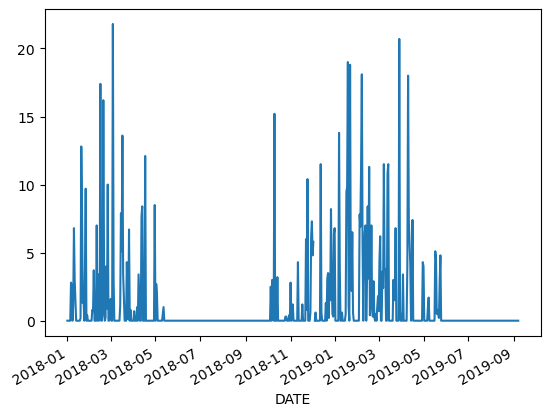

In [200]:
alta_df_snow.loc["2018":].plot()

In [201]:
alta_df_snow.dropna().isna().any()

False

<Axes: xlabel='DATE'>

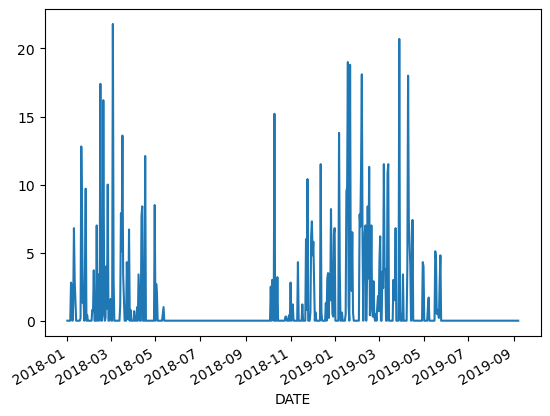

In [202]:
alta_df_snow.dropna().loc["2018":].plot()

- <u>**Filling missing values**</u> with the help of `.fillna()`, `.ffill()`, `.bfill()` etc. 

Depending on the data contents, the `.mean()`, `.mode()`, `.median` and other such methods may come in handy while using the `.fillna()` method.

- <u>**Interpolating missing values**</u> with the `.interpolate()` method may also be appropriate in some cases. By default the interpolating method will be linear interpolation.

- <u>**Using filling and interpolation in combination**</u> with the help of `.where()`/`.mask()` method

As is often the case, the trend and characteristics of the data is such that handling missing values requires us to utilize different methods for different parts of the data. Our `alta_df_snow` data series is a good example of this. 

-> In winter (1st and 4th quarter of the year) we should use interpolate/ffill/bfill methods. As, in winter it is most likey that there were snow in the days that are missing the data.

-> But, in summer (2nd and 3rd quarter of the year) we can assume that there were no snow and thus use fillna method to fill the missing values with 0.

To find out which quarter a date (datetime object) falls on we can call the `.dt.quarter` property. In case of DateTimeIndex object we can directly call the `.quarter` property to serve the same purpose.

In [203]:
winter = (alta_df_snow.index.quarter == 1) | (alta_df_snow.index.quarter == 4)

alta_df_snow.mask(winter & alta_df_snow.isna(), alta_df_snow.interpolate()).mask(
    ~winter & alta_df_snow.isna(), 0
).isna().any()

False

### <a id='toc4_2_'></a>[*Shifting Data*](#toc0_)

The `.shift()` method works on any pandas series but comes in really useful with time series **when we want to compare the current entry to the previous or subsequent entry**.

- Forward shift

In [204]:
alta_df_snow.shift(1)

DATE
1980-01-01    NaN
1980-01-02    2.0
1980-01-03    3.0
1980-01-04    1.0
1980-01-05    0.0
             ... 
2019-09-03    0.0
2019-09-04    0.0
2019-09-05    0.0
2019-09-06    0.0
2019-09-07    0.0
Name: snow, Length: 14160, dtype: float64

- Backward shift

In [205]:
alta_df_snow.shift(-1)

DATE
1980-01-01    3.0
1980-01-02    1.0
1980-01-03    0.0
1980-01-04    0.0
1980-01-05    1.0
             ... 
2019-09-03    0.0
2019-09-04    0.0
2019-09-05    0.0
2019-09-06    0.0
2019-09-07    NaN
Name: snow, Length: 14160, dtype: float64

<Axes: xlabel='DATE'>

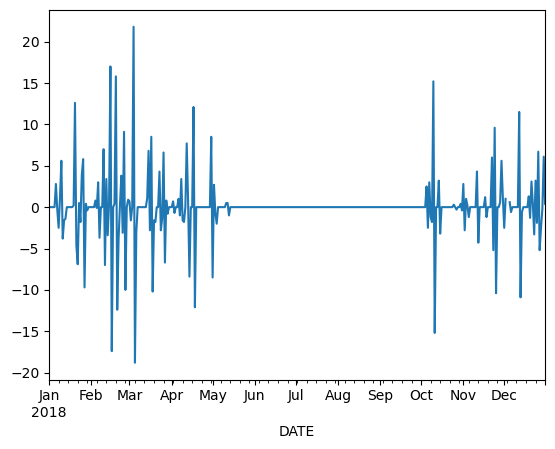

In [206]:
# For example, let's see how the snow fall changes as the seasons progress.
# to do this, we can compare the original data with a forward shifted data
(alta_df_snow - alta_df_snow.shift(1)).loc["2018"].plot()

### <a id='toc4_3_'></a>[*Rolling window calculations*](#toc0_)

The `.rolling()` function provides the feature of rolling window calculations. The concept of rolling window calculation is most primarily used in signal processing and time-series data. In very simple words, we take a window of size 'k' at a time and perform some desired mathematical operation on it. 

A window of size 'k' means, 'k' consecutive values at a time. In a very simple case, all the ‘k’ values are equally weighted.

<u>**.rolling() function Parameters**</u>

- window : Size of the moving window. This is the number of observations used for calculating the statistic. Each window will be a fixed size. If its an offset then this will be the time period of each window. Each window will be a variable sized based on the observations included in the time-period. This is only valid for datetimelike indexes. To learn more about the offsets & frequency strings, please see @https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases.

- min_periods : Minimum number of observations in window required to have a value (otherwise result is NA). For a window that is specified by an offset, this will default to 1. 

- win_type : If win_type=none, then all the values in the window are evenly weighted. There is various other types of rolling window type. To learn more about the other rolling window types see @https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.get_window.html#scipy.signal.get_window.

- on : For a DataFrame, column on which to calculate the rolling window, rather than the index.

The aggregate functions that works on the **rolling object** are, 

<img src='./imgs/aggregate_methods_for_rolling_objects.png'>

- Example: Calculating 3 day moving average snow fall

In [207]:
alta_df_snow.rolling(window=3, min_periods=2).mean()

DATE
1980-01-01         NaN
1980-01-02    2.500000
1980-01-03    2.000000
1980-01-04    1.333333
1980-01-05    0.333333
                ...   
2019-09-03    0.000000
2019-09-04    0.000000
2019-09-05    0.000000
2019-09-06    0.000000
2019-09-07    0.000000
Name: snow, Length: 14160, dtype: float64

------------------

## <a id='toc5_'></a>[Resampling](#toc0_)

---------------------

Resampling allows us to convert our time series data of a certain frequency to any frequency we may desire. This is specially useful for converting granular data to larger buckets (i.e, downscaling). 

For example, say we have a system that outputs data each second. If we have say 6 months of this data, then it will be really hard to plot that data. Also, for various analytics we may want that data in different frequencies. For example, we may want to see the daily trend. All of this becomes very easy with the pandas `.resample()` method.

> The `DataFrame.resample(rule, axis=0, closed=None, label=None, convention='start', kind=None, on=None, level=None, origin='start_day', offset=None, group_keys=False)` function is used to Resample time-series data. Is is a convenience method for frequency conversion and resampling of time series.

<u>Function Parameters</u>

- `rule:` DateOffset, Timedelta or str. The offset string or object representing target conversion.
- `closed{‘right’, ‘left’}:` Which side of bin interval is closed. The default is ‘left’ for all frequency offsets except for ‘M’, ‘A’, ‘Q’, ‘BM’, ‘BA’, ‘BQ’, and ‘W’ which all have a default of ‘right’.
- `label{‘right’, ‘left’}:` Which bin edge label to label bucket with. The default is ‘left’ for all frequency offsets except for ‘M’, ‘A’, ‘Q’, ‘BM’, ‘BA’, ‘BQ’, and ‘W’ which all have a default of ‘right’.
- `on:` For a DataFrame, column to use instead of index for resampling. Column must be datetime-like.

**Returns:** `Resampler` Object.

**Note:** The object must have a datetime-like index (DatetimeIndex, PeriodIndex, or TimedeltaIndex), or the caller must pass the label of a datetime-like series/index to the on/level keyword parameter.

Resampling generates a unique sampling distribution on the basis of the actual data. We can apply various frequency to resample our time series data. This is a very important technique in the field of analytics. 

Some of the most commonly used time series frequencies are,
- W : weekly frequency 
- M : month end frequency 
- SM : semi-month end frequency (15th and end of month) 
- Q : quarter end frequency. 

To see a full list of format strings denoting different frequencies see, https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects

**When we downscale the data, it's like groupby, but with DataTime objects and using a string for easy grouping.**

Now, we will see the application of the resample method through some examples.

- Example: Finding the maximum snowfall by month

In [208]:
alta_df_snow.resample("M").max()

DATE
1980-01-31    20.0
1980-02-29    25.0
1980-03-31    16.0
1980-04-30    10.0
1980-05-31     9.0
              ... 
2019-05-31     5.1
2019-06-30     0.0
2019-07-31     0.0
2019-08-31     0.0
2019-09-30     0.0
Freq: M, Name: snow, Length: 477, dtype: float64

- Example: Plotting a line graph for the average snowfall in each month of the years 1985 - 1990

<Axes: xlabel='DATE'>

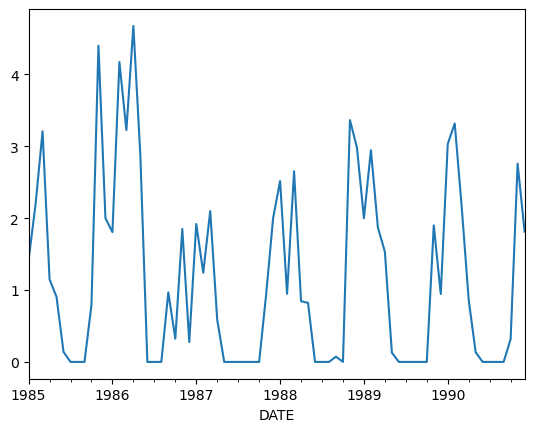

In [209]:
alta_df_snow.resample("M").mean().loc["1985":"1990"].plot()

- Example: Finding the maximum snowfall value for each ski season (which normally ends in May of each year)

In [210]:
# 'A-MAY', indicates that we want an annual grouping ('A'), but ending in May of each year
alta_df_snow.resample("A-May").max()

DATE
1980-05-31    25.0
1981-05-31    26.0
1982-05-31    34.0
1983-05-31    38.0
1984-05-31    25.0
              ... 
2016-05-31    15.0
2017-05-31    26.0
2018-05-31    21.8
2019-05-31    20.7
2020-05-31     0.0
Freq: A-MAY, Name: snow, Length: 41, dtype: float64

### <a id='toc5_1_'></a>[*Using the `.transform()` method on a `Resampler` Object*](#toc0_)

We can use the `.transform()` method with the resampled object, insted of applying separate aggregations functions or using the `.agg()`, in order to apply an aggregation while keeping the original index.

- Example: calculating the percentage of quarterly snowfall that fell in a particular day

In [211]:
alta_df_snow.div(alta_df_snow.resample("Q").transform("sum")).mul(100).fillna(0)

DATE
1980-01-01    0.527009
1980-01-02    0.790514
1980-01-03    0.263505
1980-01-04    0.000000
1980-01-05    0.000000
                ...   
2019-09-03    0.000000
2019-09-04    0.000000
2019-09-05    0.000000
2019-09-06    0.000000
2019-09-07    0.000000
Name: snow, Length: 14160, dtype: float64

------------------

## <a id='toc6_'></a>[Example](#toc0_)

---------------------

In [212]:
# the file, "./Data/capital-onebike.csv" contains
# data from Capital Bikeshare, the oldest municipal shared bike program in the United States.
# Throughout the Washington, DC area, you will find these special bike docks, where riders can
# pay to take a bike, ride it, and return to this or any other station in the network. We will be
# following one bike, ID number "W20529", on all the trips it took in October, November, and
# December of 2017. Each trip consisted of a date and time when a bike was undocked from a station,
# then some time passed, and the date and time when W20529 was docked again.

In [213]:
bike_df = pd.read_csv(
    "./Data/capital-onebike.csv", parse_dates=["Start date", "End date"]
)

In [214]:
bike_df

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member
1,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual
2,2017-10-02 06:37:10,2017-10-02 06:42:53,31036,George Mason Dr & Wilson Blvd,31037,Ballston Metro / N Stuart & 9th St N,W20529,Member
3,2017-10-02 08:56:45,2017-10-02 09:18:03,31037,Ballston Metro / N Stuart & 9th St N,31295,Potomac & M St NW,W20529,Member
4,2017-10-02 18:23:48,2017-10-02 18:45:05,31295,Potomac & M St NW,31230,Metro Center / 12th & G St NW,W20529,Member
...,...,...,...,...,...,...,...,...
285,2017-12-29 14:32:55,2017-12-29 14:43:46,31242,18th St & Pennsylvania Ave NW,31265,5th St & Massachusetts Ave NW,W20529,Member
286,2017-12-29 15:08:26,2017-12-29 15:18:51,31265,5th St & Massachusetts Ave NW,31613,Eastern Market Metro / Pennsylvania Ave & 7th ...,W20529,Casual
287,2017-12-29 20:33:34,2017-12-29 20:38:13,31613,Eastern Market Metro / Pennsylvania Ave & 7th ...,31618,4th & East Capitol St NE,W20529,Member
288,2017-12-30 13:51:03,2017-12-30 13:54:33,31618,4th & East Capitol St NE,31610,Eastern Market / 7th & North Carolina Ave SE,W20529,Member


In [215]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Start date            290 non-null    datetime64[ns]
 1   End date              290 non-null    datetime64[ns]
 2   Start station number  290 non-null    int64         
 3   Start station         290 non-null    object        
 4   End station number    290 non-null    int64         
 5   End station           290 non-null    object        
 6   Bike number           290 non-null    object        
 7   Member type           290 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 18.3+ KB


In [216]:
# the date columns are by default naive
# we need to make them timezone aware
# since the data was collected in America/New_York timezone we use .dt.tz_localize()
# which unlike the .dt.tz_convert() method does not move the time to another time zone.
# since our data contains ambiguous time data we need to define the ambiguous argument
bike_df["Start date"] = bike_df["Start date"].dt.tz_localize(
    "America/New_York", ambiguous="NaT"
)
bike_df["End date"] = bike_df["End date"].dt.tz_localize(
    "America/New_York", ambiguous="NaT"
)

In [217]:
bike_df[bike_df["Start date"].isna()]

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
129,NaT,NaT,31615,6th & H St NE,31627,3rd & M St NE,W20529,Member


In [218]:
bike_df.head()

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,2017-10-01 15:23:25-04:00,2017-10-01 15:26:26-04:00,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member
1,2017-10-01 15:42:57-04:00,2017-10-01 17:49:59-04:00,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual
2,2017-10-02 06:37:10-04:00,2017-10-02 06:42:53-04:00,31036,George Mason Dr & Wilson Blvd,31037,Ballston Metro / N Stuart & 9th St N,W20529,Member
3,2017-10-02 08:56:45-04:00,2017-10-02 09:18:03-04:00,31037,Ballston Metro / N Stuart & 9th St N,31295,Potomac & M St NW,W20529,Member
4,2017-10-02 18:23:48-04:00,2017-10-02 18:45:05-04:00,31295,Potomac & M St NW,31230,Metro Center / 12th & G St NW,W20529,Member


- Trip durations in minutes

In [219]:
bike_df["Duration_min"] = (bike_df["End date"] - bike_df["Start date"]) / timedelta(
    seconds=60
)

In [220]:
bike_df["Duration_min"].describe()

count     289.000000
mean       19.909804
std        77.112559
min         1.933333
25%         6.150000
50%        11.016667
75%        18.433333
max      1281.883333
Name: Duration_min, dtype: float64

<Axes: >

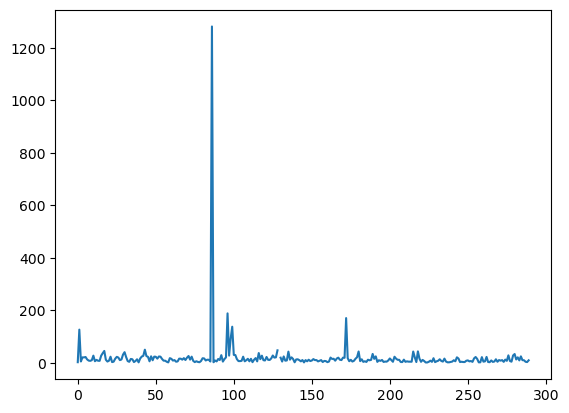

In [221]:
bike_df["Duration_min"].plot()

In [222]:
# It seems there's one outlier in the data
# Also the missing observation can be seen as a broken line

- Trip day (day name)

In [223]:
bike_df["Trip day"] = bike_df["Start date"].dt.day_name()

In [224]:
bike_df.groupby("Trip day")["Duration_min"].median()

Trip day
Friday       12.075000
Monday       13.508333
Saturday      7.700000
Sunday       15.283333
Thursday     10.866667
Tuesday      10.691667
Wednesday     9.750000
Name: Duration_min, dtype: float64

- How many "joyrides" (Suppose you have a theory that some people take long bike rides before putting their bike back in the same dock. Let's call these rides "joyrides").

In [230]:
# Create joyrides
joyrides = bike_df["Start station number"] == bike_df["End station number"]

# Total number of joyrides
print("{} rides were joyrides".format(joyrides.sum()))

# We use median since many observations in our dataset can be considered outliers

# Median of all rides
print(
    "The median duration overall was {:.2f} mins".format(
        bike_df["Duration_min"].median()
    )
)

# Median of joyrides
print(
    "The median duration for joyrides was {:.2f} mins".format(
        bike_df[joyrides]["Duration_min"].median()
    )
)

6 rides were joyrides
The median duration overall was 11.02 mins
The median duration for joyrides was 44.04 mins


- How long between rides

In [227]:
# Shift the index of the end date up one; now subract it from the start date
bike_df["Time since"] = bike_df["Start date"] - (bike_df["End date"].shift(1))

# Move from a timedelta to a number of seconds, which is easier to work with
bike_df["Time since"] = bike_df["Time since"].dt.total_seconds()

# Resample to the month
monthly = bike_df.resample("M", on="Start date")

# Print the average hours between rides each month
print(monthly["Time since"].mean() / (60 * 60))

Start date
2017-10-31 00:00:00-04:00    5.519242
2017-11-30 00:00:00-05:00    7.256474
2017-12-31 00:00:00-05:00    9.202380
Name: Time since, dtype: float64


- How long was the median ride by month, and by Membership type?

**Note:** First `groupby` then `resample`.

In [235]:
bike_df.groupby(["Member type"]).resample("M", on="Start date")["Duration_min"].median()

Member type  Start date               
Casual       2017-10-31 00:00:00-04:00    27.266667
             2017-11-30 00:00:00-05:00    19.325000
             2017-12-31 00:00:00-05:00    14.166667
Member       2017-10-31 00:00:00-04:00    11.183333
             2017-11-30 00:00:00-05:00    10.950000
             2017-12-31 00:00:00-05:00     6.458333
Name: Duration_min, dtype: float64